In [1]:
import json
import matplotlib.pyplot as plt

annotations_dir = '../'

annotation_file = f'{annotations_dir}/combined_dict.json'
with open(annotation_file, 'r') as f:
    data = json.load(f)

categories = data['categories']
category_names = [category['name'] for category in categories]
category_ids = [category['id'] for category in categories]

class_counts = {category_id: 0 for category_id in category_ids}

for annotation in data['annotations']:
    category_id = annotation['category_id']
    class_counts[category_id] += 1

sorted_categories = sorted(category_ids, key=lambda x: class_counts[x], reverse=True)

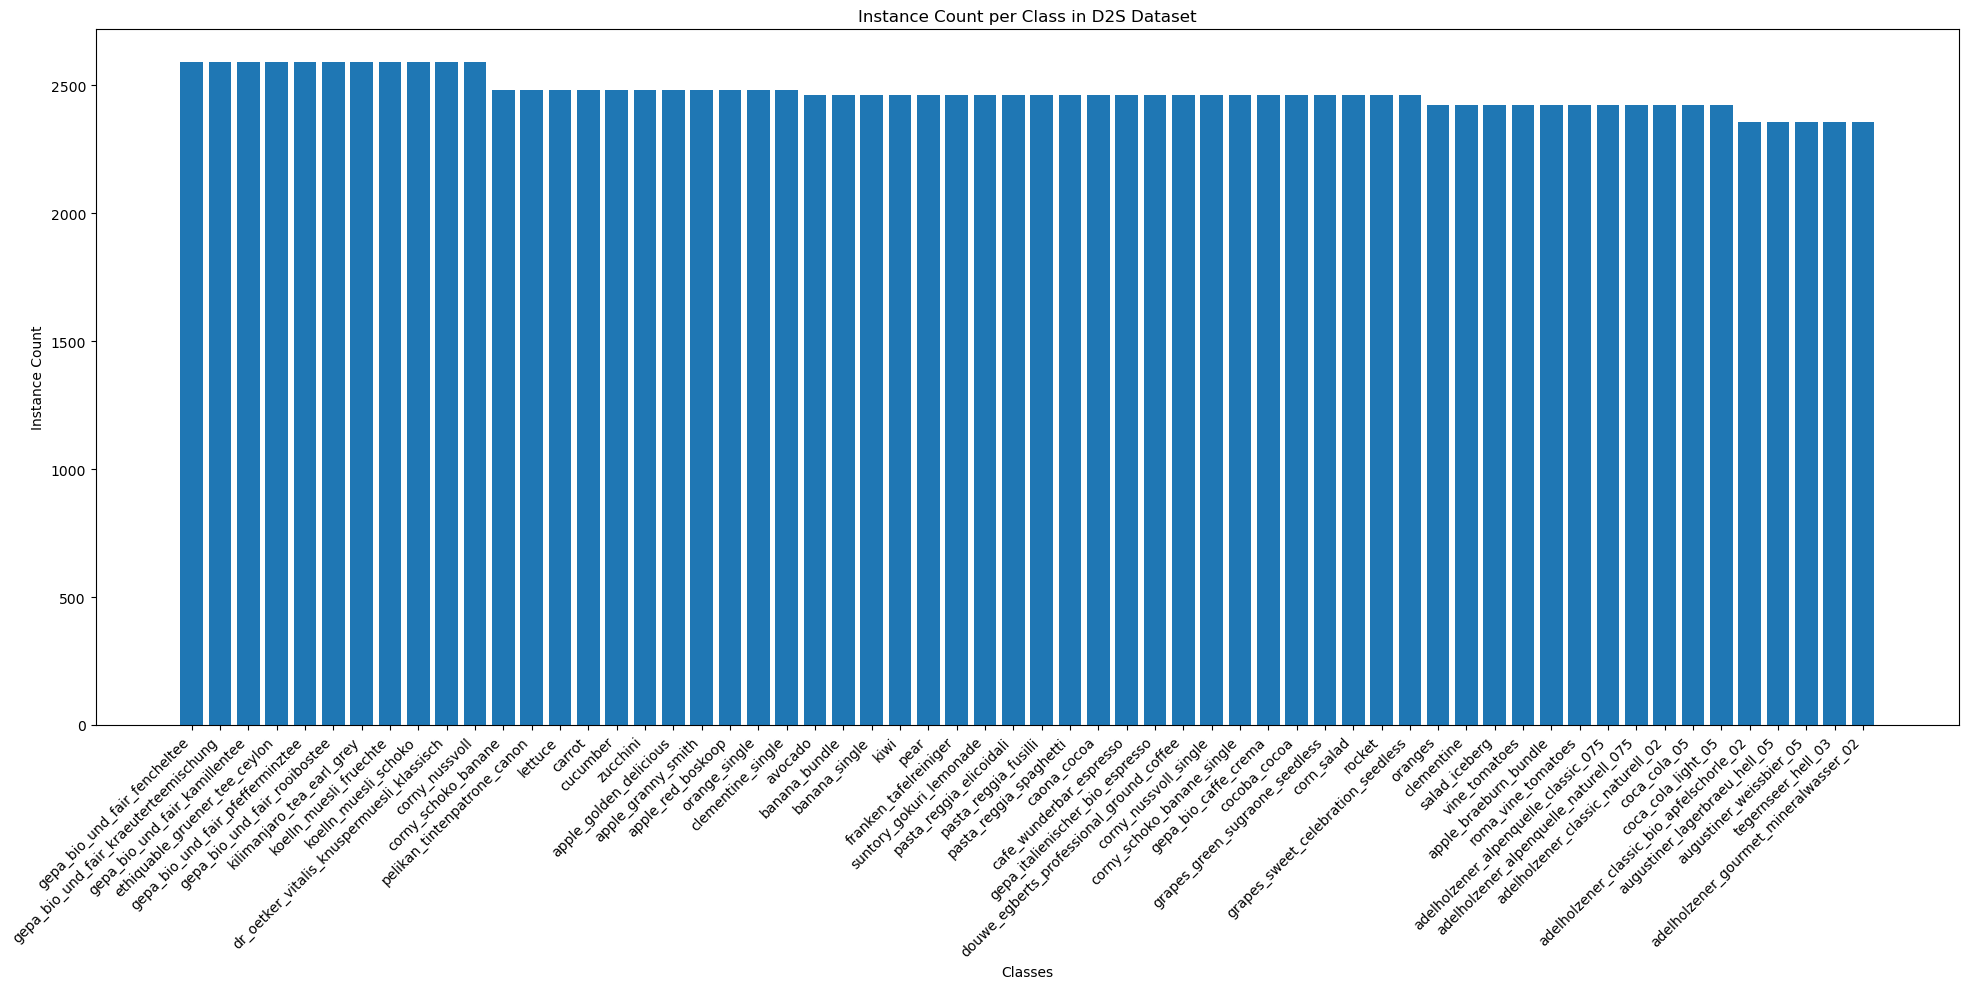

In [2]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(category_names, [class_counts[category_id] for category_id in sorted_categories])
ax.set_xlabel('Classes')
ax.set_ylabel('Instance Count')
ax.set_title('Instance Count per Class in D2S Dataset')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()